# Medium comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.fft import fft, ifft, ifft2, rfft, rfftfreq, fft2, ifftn, irfft
import matplotlib.animation as animation
from celluloid import Camera
import os
import glob as glob
from IPython.display import HTML
from tqdm import tqdm
from scipy.integrate import cumtrapz, simps

Reminder (must be 0 to get zero phase signal) 0.7142857142857224
Sampling frequency: 10000.0 2850


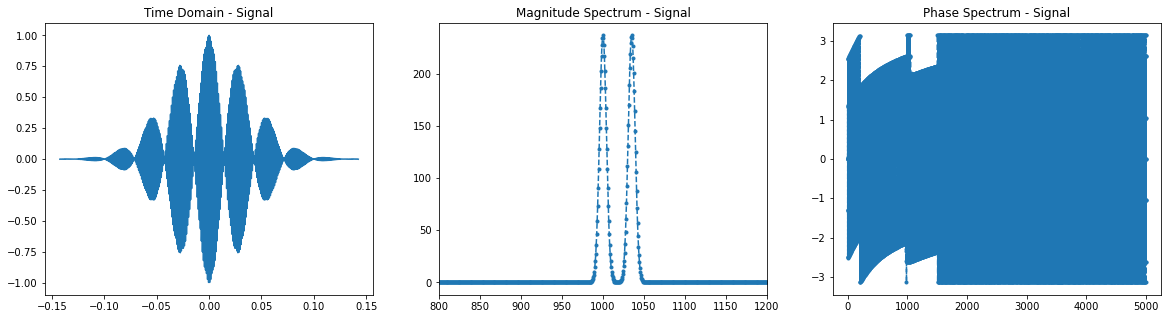

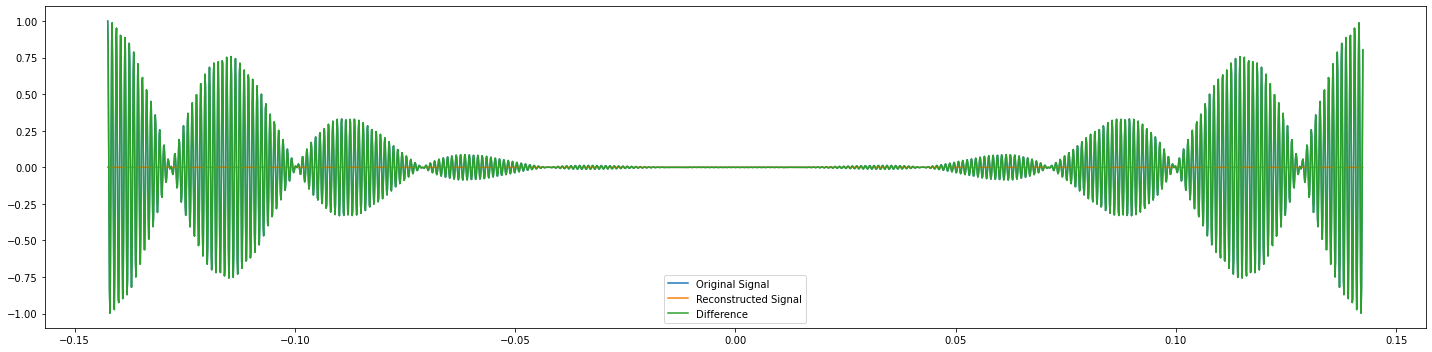

In [2]:
# Frequency setup
fc = 1000
fmod = 35
f1 = fc
f2 = fc + fmod

# Time domain setup
dt = 0.0001
nt = 10*int(1/(fmod*dt)) # multiple of number of samples per cycle of fmod modulating signal
print('Reminder (must be 0 to get zero phase signal)', 1/(fmod*dt)- int(1/(fmod*dt)))
t = np.arange(nt) * dt 
t -= t[nt//2]
print('Sampling frequency:', 1/dt, nt)

# Generate the DSB-SC signal
agauss = 3.5e2
carrier = np.cos(np.pi*(f1+f2)*t) * np.cos(np.pi*(f1-f2)*t)
gaussian = np.exp(-agauss*t**2)
signal = carrier * gaussian

# Zero padding of 5 times the original signal length
zero_padded_signal = np.concatenate((signal, np.zeros(5 * len(signal))))

# Extend time array to match the zero-padded signal
t_extended = np.concatenate((t, t[-1] + np.arange(1, 5 * len(t) + 1) * dt))

# FFT of the signal
SIGNAL = np.fft.rfft(np.fft.ifftshift(zero_padded_signal))
f = np.fft.rfftfreq(len(zero_padded_signal), dt)  # Adjust the frequency range based on the new signal length

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the time domain signal
#axs[0].plot(t_extended, zero_padded_signal)
axs[0].plot(t, signal)
axs[0].set_title('Time Domain - Signal')

# Plot the magnitude spectrum
axs[1].plot(f, np.abs(SIGNAL), '--.')
axs[1].set_title('Magnitude Spectrum - Signal')
axs[1].set_xlim(f1-fc//5, f1+fc//5)

# Plot the phase spectrum
axs[2].plot(f, np.angle(SIGNAL), '--.')
axs[2].set_title('Phase Spectrum - Signal')

# Reconstruction and error analysis
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(t, np.fft.ifftshift(signal), label='Original Signal')
ax.plot(t, np.fft.irfft(np.abs(SIGNAL), n=len(t)), label='Reconstructed Signal')
ax.plot(t, np.fft.ifftshift(signal)- np.fft.irfft(np.abs(SIGNAL), n=len(t)), label='Difference')
ax.legend()

# Show plots
plt.tight_layout()
plt.show()


In [3]:
time1 = np.load('np_arrays/lossless.npy')
time2 = np.load('np_arrays/water.npy')
time3 = np.load('np_arrays/attenuated.npy')

In [4]:
_ax = np.where(abs(time1[171//2, 100, :])>1e3)[0][0]
_ax
wav_axis = range(_ax, np.int64(_ax + 1.2*nt))

xmin = -20
xmax = 20
zmin = 0
zmax = 100
nz = 250
nx=170
dz = (zmax - zmin) / nz
dx = (xmax-xmin)/nx


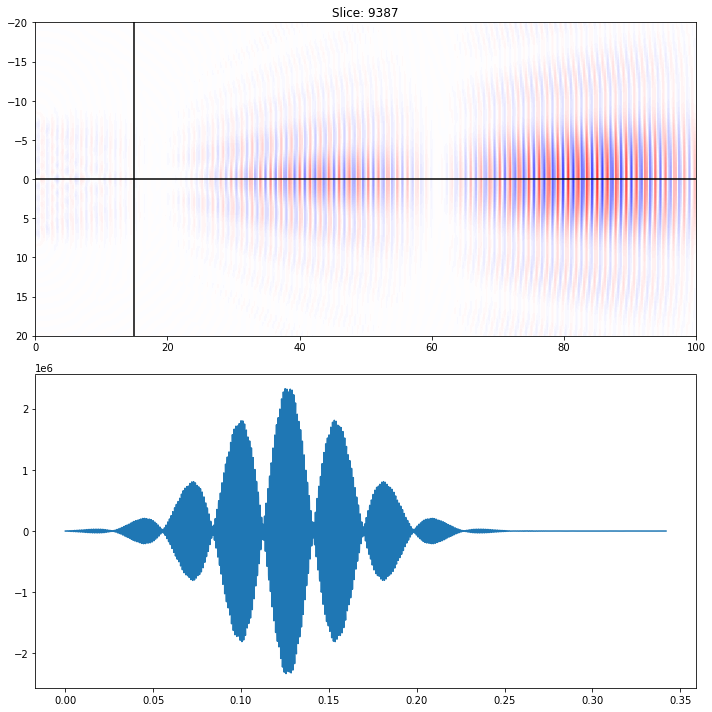

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

i = _ax + 2000
t = np.arange(len(wav_axis)) * dt

axs[0].imshow(time1[:, :, i], cmap='seismic', vmax=4e6, vmin=-4e6, extent=(zmin, zmax, xmax, xmin), aspect='auto')
axs[0].axhline(0, c='k')
axs[0].axvline(15, c='k')

axs[1].plot(t, p := time1[171//2, int(15*2.5), wav_axis])

axs[0].set_title(f'Slice: {i}')  # Set a dynamic title on the first subplot
plt.tight_layout()


NameError: name 'time_arr' is not defined

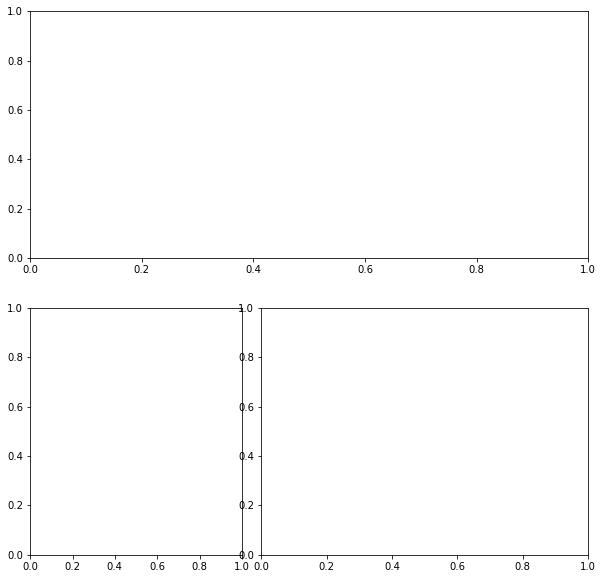

In [6]:
fig, axs = plt.subplot_mosaic('''
AAAAA
BBCCC
''', figsize = (10, 10), sharey=False)

camera = Camera(fig)

axs['A'].imshow(time_arr[:, :, i], cmap='seismic', vmax=4e6, vmin=-4e6, extent=(zmin, zmax, xmax, xmin), aspect='auto')
axs['A'].axhline(0, c='k')
axs['A'].axvline(15, c='k')
axs['A'].scatter(15, 0, marker = '*', s=500, zorder=100, c='r')
axs['A'].scatter(15, 4, marker = '*', s=500, zorder=100, c='b')
axs['A'].scatter(15, -4, marker = '*', s=500, zorder=100, c='k')
axs['A'].scatter(15, 8, marker = '*', s=500, zorder=100, c='c')
axs['A'].scatter(15, -8, marker = '*', s=500, zorder=100, c='y')

axs['B'].imshow(time_arr[171//2-20:171//2+20, int(15*2.5)-20:int(15*2.5)+20, i], cmap='seismic', vmax=4e6, vmin=-4e6, aspect='auto')
axs['B'].set(xticks=[], yticks=[])

axs['C'].plot(_p := time_arr[171//2, int(15*2.5), wav_axis], t, c='r')
axs['C'].plot(time_arr[171//2-10, int(15*2.5), wav_axis]+4e6, t, c='k')
axs['C'].plot(time_arr[171//2+10, int(15*2.5), wav_axis]-4e6, t, c='b')
axs['C'].plot(time_arr[171//2+20, int(15*2.5), wav_axis]+8e6, t, c='c')
axs['C'].plot(time_arr[171//2-20, int(15*2.5), wav_axis]-8e6, t, c='y')

axs['C'].set_ylim(0, 0.15)
axs['C'].invert_yaxis()

plt.tight_layout()

## To make video

 62%|████████████████████████▏              | 2116/3420 [25:09<15:30,  1.40it/s]


KeyboardInterrupt: 

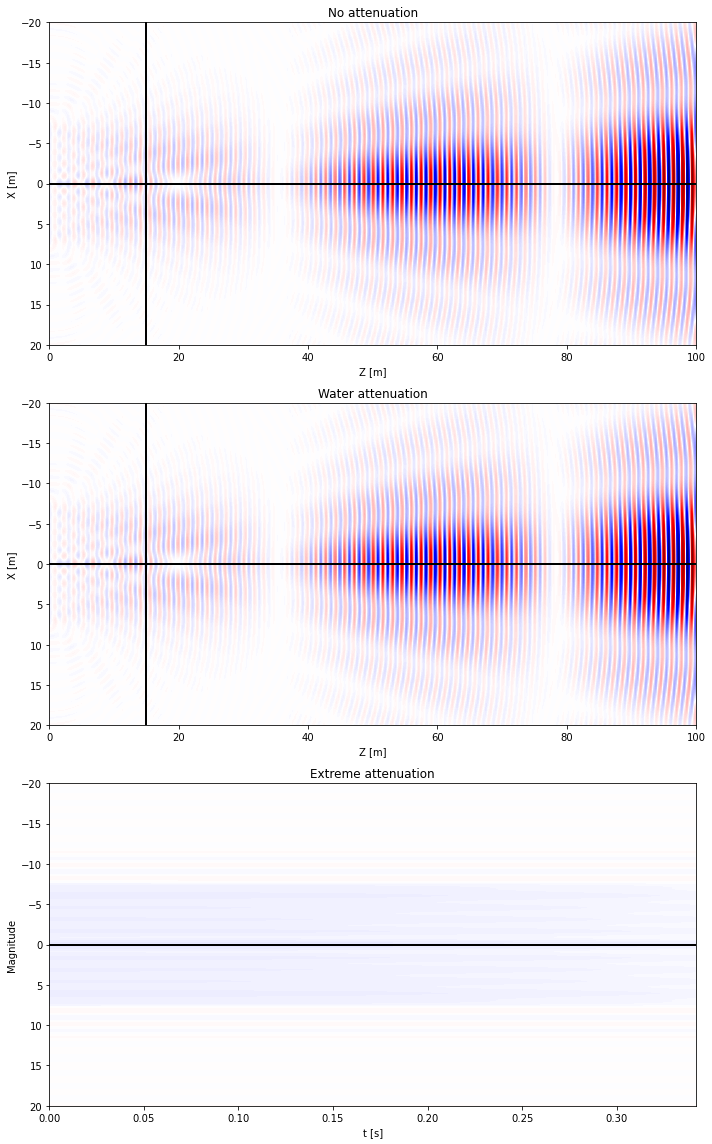

In [7]:
fig, axs = plt.subplots(3, 1, figsize=(10, 16))

camera = Camera(fig)

t = np.arange(len(wav_axis)) * dt

for i in tqdm(wav_axis):
    
    axs[0].imshow(time1[:, :, i], cmap='seismic', vmax=1e6, vmin=-1e6, extent=(zmin, zmax, xmax, xmin), aspect='auto', interpolation='gaussian')
    axs[0].set_title('No attenuation')
    axs[0].axhline(0, c='k')
    axs[0].axvline(15, c='k')

    axs[1].imshow(time2[:, :, i], cmap='seismic', vmax=1e6, vmin=-1e6, extent=(zmin, zmax, xmax, xmin), aspect='auto', interpolation='gaussian')
    axs[1].set_title('Water attenuation')
    axs[1].axhline(0, c='k')
    axs[1].axvline(15, c='k')

    axs[2].imshow(time3[:, :, i], cmap='seismic', vmax=1e6, vmin=-1e6, extent=(zmin, zmax, xmax, xmin), aspect='auto', interpolation='gaussian')
    axs[2].set_title('Extreme attenuation')
    axs[2].axhline(0, c='k')
    axs[2].axvline(15, c='k')

    axs[0].set(xlabel='Z [m]', ylabel='X [m]')
    axs[1].set(xlabel='Z [m]', ylabel='X [m]')
    axs[2].set(xlabel='t [s]', ylabel='Magnitude', xlim=(t[0], t[-1]))

    plt.tight_layout()
    camera.snap()

animation = camera.animate(interval = 10)
animation.save('comparison_1.mp4')